<a href="https://colab.research.google.com/github/kanishkkg/ampba_24_group18_term2/blob/main/ml_ul/GR_18_MLUL1_group18_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jupyter notebook submission created by Group 18
* Kanishk Kumar Gupta - 12310008

## Part (1/2) - Exploratory Data Analysis and Customer Segementation

### Installing relevant libraries

In [2]:
import pandas as pd
import numpy as np
import string

!pip install scikit-learn --upgrade
from sklearn.cluster import KMeans, AgglomerativeClustering, HDBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 53.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


### Reading the data

In [1]:
url = 'https://raw.githubusercontent.com/kanishkkg/ampba_24_group18_term2/main/ml_ul/Champo%20Carpets%20V1.csv'

In [3]:
base_data = pd.read_csv(url)

### Creating new dataset for EDA

In [4]:
eda_data = base_data.copy(deep=True)

In [5]:
eda_data.head()

,OrderiD,Item_Id,CustomerCode,CountryName,customer_country,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName
0,1,5,H-1,USA,H-1USA,6,128.25,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC
1,1,26,H-1,USA,H-1USA,6,117.00,702.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],BEIGE,REC
2,1,17,H-1,USA,H-1USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,WEMBLY [CC-206],BEIGE/SAGE,REC
3,1,496,H-1,USA,H-1USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,SYMPHONY [8900],CHARCOAL,REC
4,1,30,H-1,USA,H-1USA,5,117.00,585.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],NAVY/BEIGE,REC


In [ ]:
eda_data.describe(include='all')

,OrderiD,Item_Id,CustomerCode,CountryName,customer_country,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName
count,13135.000000,13135.000000,13135,13135,13135,13135.000000,13135.000000,13135.000000,13135,13135,13135,13135,13135
unique,NaN,NaN,45,14,45,NaN,NaN,NaN,12,184,987,464,5
top,NaN,NaN,M-1,USA,M-1USA,NaN,NaN,NaN,HAND TUFTED,TUFTED 60C,PLAIN,MULTI,REC
freq,NaN,NaN,2380,9196,2380,NaN,NaN,NaN,4670,1215,645,970,12777
mean,3075.336962,14528.683746,NaN,NaN,NaN,44.460601,44.731370,2392.040164,NaN,NaN,NaN,NaN,NaN
std,2107.731646,13183.139544,NaN,NaN,NaN,228.749535,50.099597,16832.091080,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN,1.000000,0.040000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1219.500000,3023.000000,NaN,NaN,NaN,3.000000,5.800000,163.200000,NaN,NaN,NaN,NaN,NaN
50%,2934.000000,8631.000000,NaN,NaN,NaN,8.000000,24.000000,590.625000,NaN,NaN,NaN,NaN,NaN
75%,4630.000000,26713.000000,NaN,NaN,NaN,20.000000,80.000000,1540.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Finding number of unique orders
len(eda_data.OrderiD.unique())

2412

In [ ]:
# Finding number of unique customers
len(eda_data.customer_country.unique())

45

In [ ]:
# Looking at a specific order to get more insights
eda_data[eda_data.OrderiD == 1].sort_values(by='Item_Id')

,OrderiD,Item_Id,CustomerCode,CountryName,customer_country,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName
47,1,1,H-1,USA,H-1USA,2,6.0000,12.000,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC
45,1,2,H-1,USA,H-1USA,2,9.0000,18.000,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC
24,1,3,H-1,USA,H-1USA,2,54.0000,108.000,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC
7,1,4,H-1,USA,H-1USA,5,71.2500,356.250,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC
0,1,5,H-1,USA,H-1USA,6,128.2500,769.500,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC
31,1,6,H-1,USA,H-1USA,2,36.0000,72.000,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,ROUND
36,1,7,H-1,USA,H-1USA,2,24.0000,48.000,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],TERRA/BLUE,REC
37,1,8,H-1,USA,H-1USA,8,6.0000,48.000,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],TERRA/BLUE,REC
29,1,9,H-1,USA,H-1USA,2,40.0000,80.000,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],TERRA/BLUE,REC
19,1,10,H-1,USA,H-1USA,5,27.0000,135.000,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],TERRA/BLUE,REC


In [ ]:
eda_data.isnull().sum()

OrderiD             0
Item_Id             0
CustomerCode        0
CountryName         0
customer_country    0
QtyRequired         0
TotalArea           0
Amount              0
ITEM_NAME           0
QualityName         0
DesignName          0
ColorName           0
ShapeName           0
qty*area            0
dtype: int64

<Axes: xlabel='QtyRequired', ylabel='Density'>

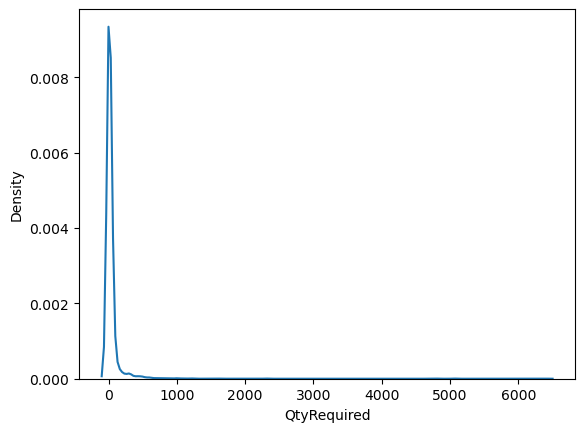

In [ ]:
sns.kdeplot(eda_data.QtyRequired)

In [ ]:
# Basic statistics and distributions
eda_summary = {
    "Number of Orders": eda_data['OrderiD'].nunique(),
    "Number of Items": eda_data['Item_Id'].nunique(),
    "Number of Customers": eda_data['CustomerCode'].nunique(),
    "Countries Represented": eda_data['CountryName'].nunique(),
    "Most Popular Item": eda_data['ITEM_NAME'].value_counts().idxmax(),
    "Highest Selling Design": eda_data['DesignName'].value_counts().idxmax(),
    "Most Common Color": eda_data['ColorName'].value_counts().idxmax(),
    "Popular Carpet Shape": eda_data['ShapeName'].value_counts().idxmax(),
    "Average Quantity Required": eda_data['QtyRequired'].mean(),
    "Average Total Area": round(eda_data['TotalArea'].mean(), 2),
    "Average Order Amount": round(eda_data['Amount'].mean(), 2)
}

eda_summary

{'Number of Orders': 2412,
 'Number of Items': 5875,
 'Number of Customers': 45,
 'Countries Represented': 14,
 'Most Popular Item': 'HAND TUFTED',
 'Highest Selling Design': 'PLAIN',
 'Most Common Color': 'MULTI',
 'Popular Carpet Shape': 'REC',
 'Average Quantity Required': 44.46060144651694,
 'Average Total Area': 44.73,
 'Average Order Amount': 2392.04}

In [ ]:
unique_orders_per_country = eda_data.groupby('CountryName')['OrderiD'].nunique().reset_index()
unique_orders_per_country.rename(columns={'OrderiD': 'Unique Orders'}, inplace=True)
unique_orders_per_country.sort_values(by='Unique Orders', ascending=False)

,CountryName,Unique Orders
13,USA,1661
12,UK,336
7,ITALY,219
1,BELGIUM,54
5,INDIA,49
0,AUSTRALIA,35
9,ROMANIYA,18
3,CANADA,9
4,CHINA,9
2,BRAZIL,8


In [ ]:
# Finding the most ordered item by country
item_country = eda_data.groupby('CountryName')['ITEM_NAME'].agg(lambda x:x.value_counts().idxmax())
item_country

CountryName
AUSTRALIA       HAND TUFTED
BELGIUM               DURRY
BRAZIL                DURRY
CANADA          DOUBLE BACK
CHINA                 DURRY
INDIA           HAND TUFTED
ISRAEL                DURRY
ITALY           HAND TUFTED
LEBENON         DOUBLE BACK
ROMANIYA        HAND TUFTED
SOUTH AFRICA    HAND TUFTED
UAE                   DURRY
UK                    DURRY
USA             HAND TUFTED
Name: ITEM_NAME, dtype: object

In [ ]:
# Finding average order value by country
avg_amount_country = round(eda_data.groupby('CountryName')['Amount'].mean(), 2).sort_values(ascending=False)
avg_amount_country

CountryName
UAE             22117.00
USA              2945.07
ISRAEL           2141.11
BELGIUM          1994.35
SOUTH AFRICA     1553.07
UK               1318.18
AUSTRALIA        1185.84
ITALY            1021.96
ROMANIYA          978.50
INDIA             760.69
CHINA             437.19
CANADA            427.76
BRAZIL            374.23
LEBENON           337.75
Name: Amount, dtype: float64

In [ ]:
# Checking the validity of customer_country column
eda_data[eda_data.CustomerCode + eda_data.CountryName != eda_data.customer_country]
# The column concatenated column is correct

,OrderiD,Item_Id,CustomerCode,CountryName,customer_country,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName


In [ ]:
# Creating a new variable to capture Qty times Area
eda_data['qty*area'] = eda_data['QtyRequired'] * eda_data['TotalArea']
eda_data.corr()

,OrderiD,Item_Id,QtyRequired,TotalArea,Amount,qty*area
OrderiD,1.000000,0.647888,0.130061,-0.062661,0.044904,0.086229
Item_Id,0.647888,1.000000,0.204584,-0.146181,0.085258,0.142530
QtyRequired,0.130061,0.204584,1.000000,-0.096142,0.109705,0.505199
TotalArea,-0.062661,-0.146181,-0.096142,1.000000,0.065641,0.061382
Amount,0.044904,0.085258,0.109705,0.065641,1.000000,0.240042
qty*area,0.086229,0.142530,0.505199,0.061382,0.240042,1.000000


<Axes: xlabel='TotalArea', ylabel='Amount'>

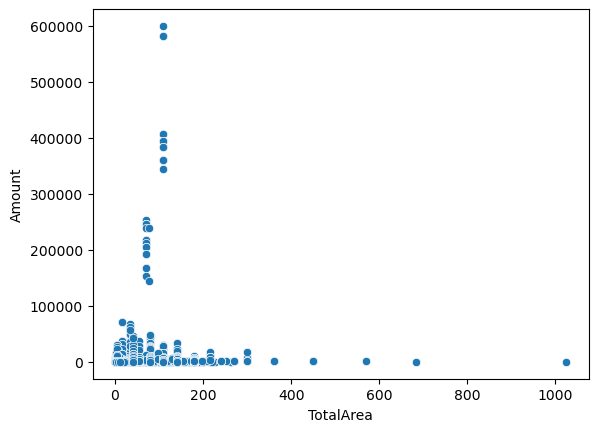

In [ ]:
sns.scatterplot(data=eda_data, x="TotalArea", y="Amount")

<Axes: xlabel='qty*area', ylabel='Amount'>

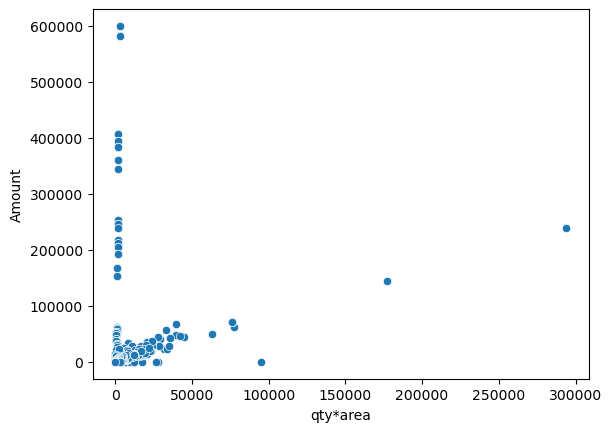

In [ ]:
sns.scatterplot(data=eda_data, x="qty*area", y="Amount")

<Axes: xlabel='order_count', ylabel='Count'>

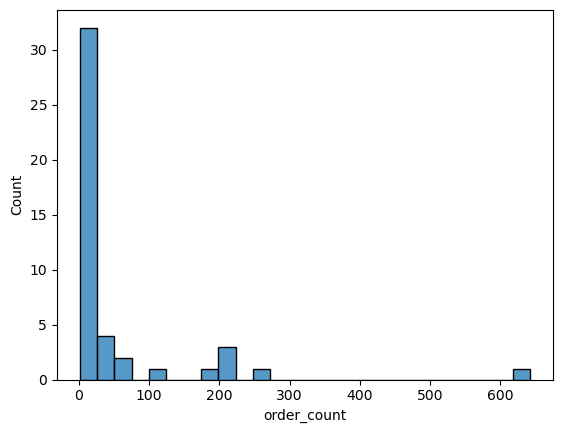

In [ ]:
cust_count = eda_data.groupby(['customer_country']).agg({'OrderiD':'nunique'}).reset_index()
cust_count.columns = ['customer_id', 'order_count']
sns.histplot( cust_count['order_count'])

### Customer Segmentation

Steps for Customer Segmentation -
1. Create two new features for segmentation
2. Analyze the two new features -
    * Clean the data if required
    * Find correlations or patterns in them
    * Scale the data and prepare it for clustering
3. Perform the following clustering techniques -
    * K Means
    * HDBSCAN
    * Agglomerative
4. Visualize the results from the three clustering techniques.

In [ ]:
customer_data = base_data.copy(deep=True)

In [ ]:
# Instead of using customer column, we are using customer_country column
# which will be a better identifier for a customer in the given data for a customer.
# Insights from this will replicable if we use the other column

customer_agg_data = customer_data.groupby(['customer_country']).agg({'OrderiD':'nunique', 'Amount': 'sum'}).reset_index()
customer_agg_data.rename(columns={'OrderiD':'frequency', 'Amount':'monetary_value'}, inplace=True)
customer_agg_data['monetary_value'] = round(customer_agg_data['monetary_value'], 2)
customer_agg_data

,customer_country,frequency,monetary_value
0,A-11USA,11,185404.10
1,A-6USA,2,6247.46
2,A-9USA,210,1592079.79
3,B-2CHINA,8,14811.16
4,B-3USA,11,58626.86
5,B-4USA,1,26242.50
6,C-1USA,223,567620.72
7,C-2USA,100,1557123.00
8,C-3USA,7,99062.35
9,CCINDIA,49,147574.00


In [ ]:
customer_agg_data.corr()

,frequency,monetary_value
frequency,1.000000,0.281832
monetary_value,0.281832,1.000000


In [ ]:
customer_agg_data.sort_values(by='frequency', ascending = False)

,customer_country,frequency,monetary_value
31,P-5USA,643,3066518.23
20,JLUK,269,1231578.28
6,C-1USA,223,567620.72
38,T-2ITALY,219,563098.85
2,A-9USA,210,1592079.79
27,M-1USA,181,1959794.03
7,C-2USA,100,1557123.00
18,H-2USA,69,3804801.30
40,T-5UK,67,733832.95
9,CCINDIA,49,147574.00


In [ ]:
customer_agg_data.describe(include='all')

,customer_country,frequency,monetary_value
count,45,45.000000,4.500000e+01
unique,45,NaN,NaN
top,A-11USA,NaN,NaN
freq,1,NaN,NaN
mean,NaN,53.600000,6.982099e+05
std,NaN,113.021599,1.808977e+06
min,NaN,1.000000,3.288800e+02
25%,NaN,3.000000,3.970124e+04
50%,NaN,11.000000,1.167783e+05
75%,NaN,48.000000,4.266260e+05


In [ ]:
customer_agg_data.sort_values(by='monetary_value', ascending=False)

,customer_country,frequency,monetary_value
43,TGTUSA,36,11341052.51
18,H-2USA,69,3804801.30
31,P-5USA,643,3066518.23
27,M-1USA,181,1959794.03
2,A-9USA,210,1592079.79
7,C-2USA,100,1557123.00
20,JLUK,269,1231578.28
29,N-1USA,20,949375.68
40,T-5UK,67,733832.95
6,C-1USA,223,567620.72


In [ ]:
customer_agg_data

,customer_country,frequency,monetary_value
0,A-11USA,11,185404.10
1,A-6USA,2,6247.46
2,A-9USA,210,1592079.79
3,B-2CHINA,8,14811.16
4,B-3USA,11,58626.86
5,B-4USA,1,26242.50
6,C-1USA,223,567620.72
7,C-2USA,100,1557123.00
8,C-3USA,7,99062.35
9,CCINDIA,49,147574.00


<Axes: xlabel='frequency', ylabel='monetary_value'>

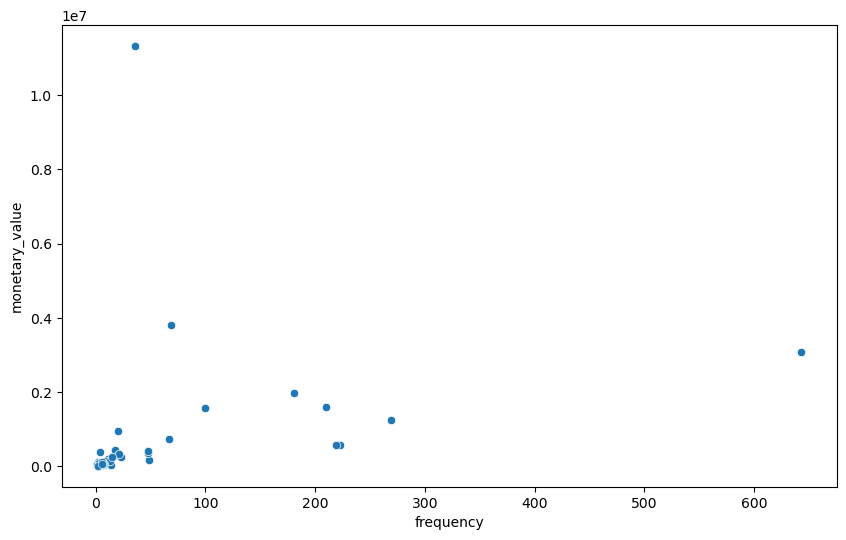

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=customer_agg_data, x='frequency', y='monetary_value')

In [ ]:
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_agg_data[['frequency', 'monetary_value']])

### K Means Clustering

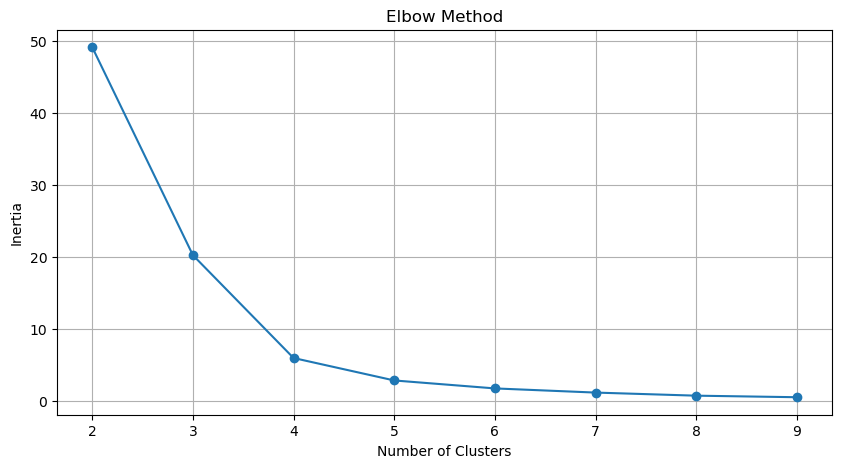

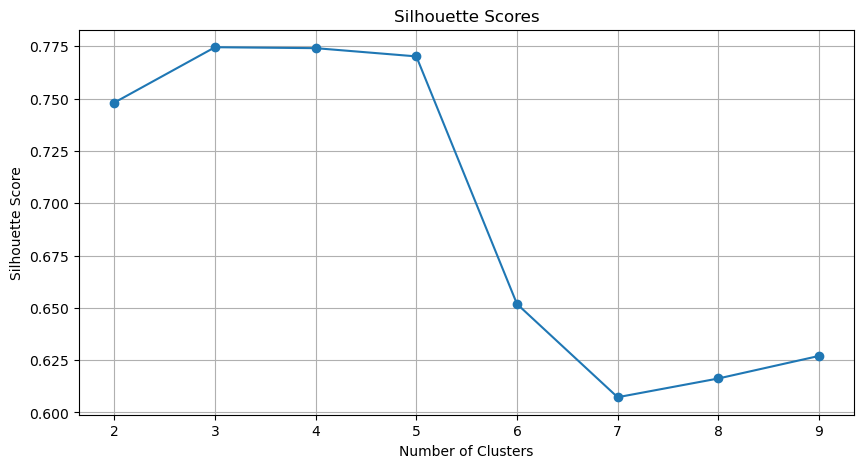

In [ ]:
# Step 1: Finding the optimal number of clusters using the Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
range_values = range(2, 10)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


### From the charts above, cluster size 3 or 4 seems to be the most optimal ones.
### Let's visualize the data to see if we can make a decision

In [ ]:
def visualize_kmeans_clusters(n_clusters, customer_agg_data, scaled_features):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans_labels = kmeans.fit_predict(scaled_features)

    # Generate cluster names (0, 1, 2, ...)
    cluster_names = range(n_clusters + 1)

    # Visualizing the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans_labels, cmap='viridis', marker='o')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    for i, center in enumerate(kmeans.cluster_centers_):
        plt.text(center[0], center[1], cluster_names[i], color='blue', fontweight='bold', fontsize=12)

    plt.title(f"Customer Segments for {n_clusters} cluster/s")
    plt.xlabel("Scaled Frequency")
    plt.ylabel("Scaled Monetary Value")
    plt.show()

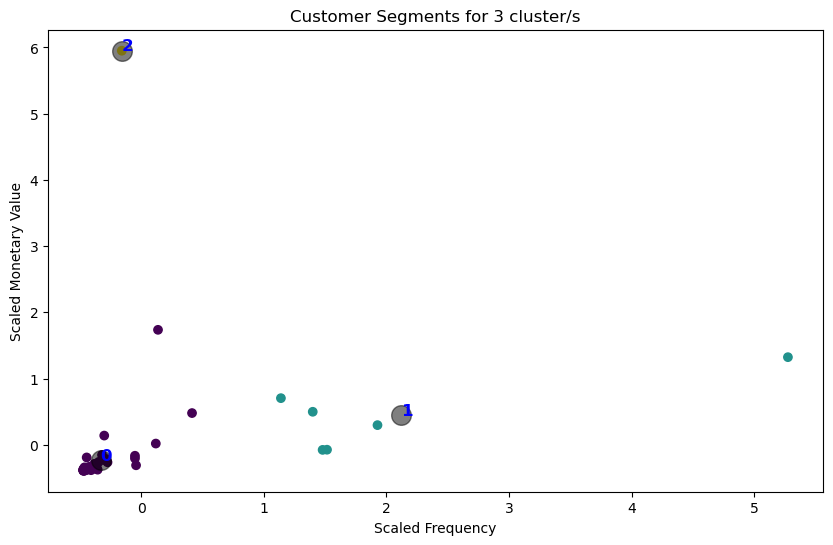

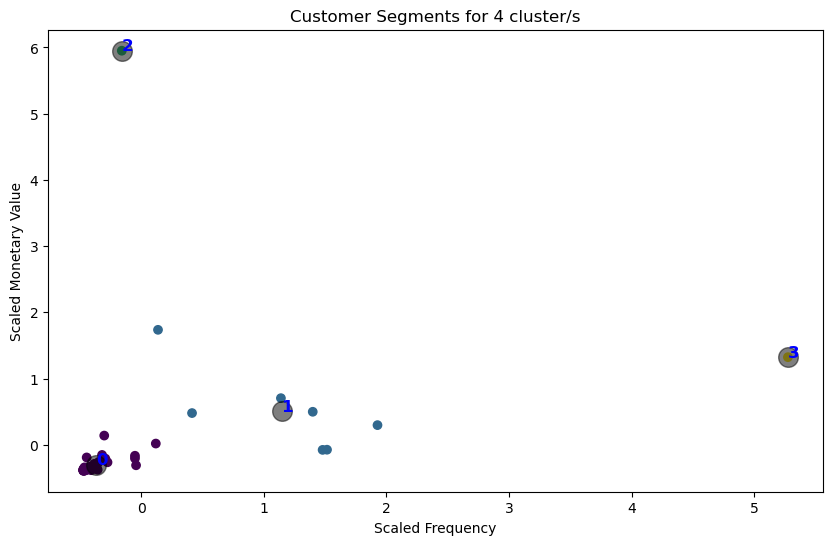

In [ ]:
visualize_kmeans_clusters(3, customer_agg_data, scaled_features)
visualize_kmeans_clusters(4, customer_agg_data, scaled_features)

### It looks like creating 4 clusters is slightly better as the single customer on the extreme right
### is tampering with the one of the cluster

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_features)
customer_agg_data['kmeans_cluster'] = kmeans_labels

In [ ]:
# Descriptive statistics for each cluster
cluster_description = four_cluster_data.groupby('kmeans_cluster').agg({
    'frequency': ['mean', 'median', 'min', 'max'],
    'monetary_value': ['mean', 'median', 'min', 'max']
})

print(cluster_counts)
print(cluster_description.round(2))

-1     3
 0    37
 1     5
Name: hdbscan_cluster, dtype: int64
               frequency                  monetary_value               \
                    mean median  min  max           mean       median   
kmeans_cluster                                                          
0                  12.83    7.0    1   67      159327.25     63375.90   
1                 181.57  210.0   69  269     1610870.85   1557123.00   
2                  36.00   36.0   36   36    11341052.51  11341052.51   
3                 643.00  643.0  643  643     3066518.23   3066518.23   

                                          
                        min          max  
kmeans_cluster                            
0                    328.88    949375.68  
1                 563098.85   3804801.30  
2               11341052.51  11341052.51  
3                3066518.23   3066518.23  


### AgglomerativeClustering

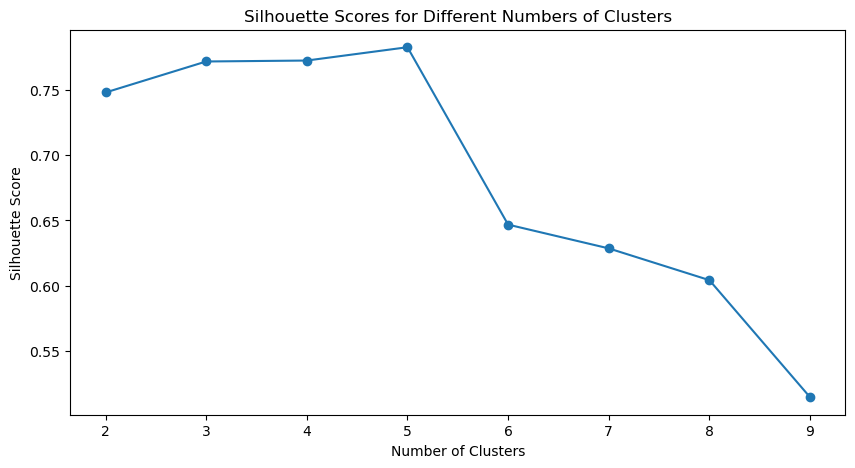

Optimal number of clusters are 5


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Agglomerative Clustering with a range of cluster numbers to find the optimal number
range_n_clusters = range(2, 10)
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Silhouette Scores for different numbers of clusters
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Choose the optimal number of clusters
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters are {optimal_n_clusters}")

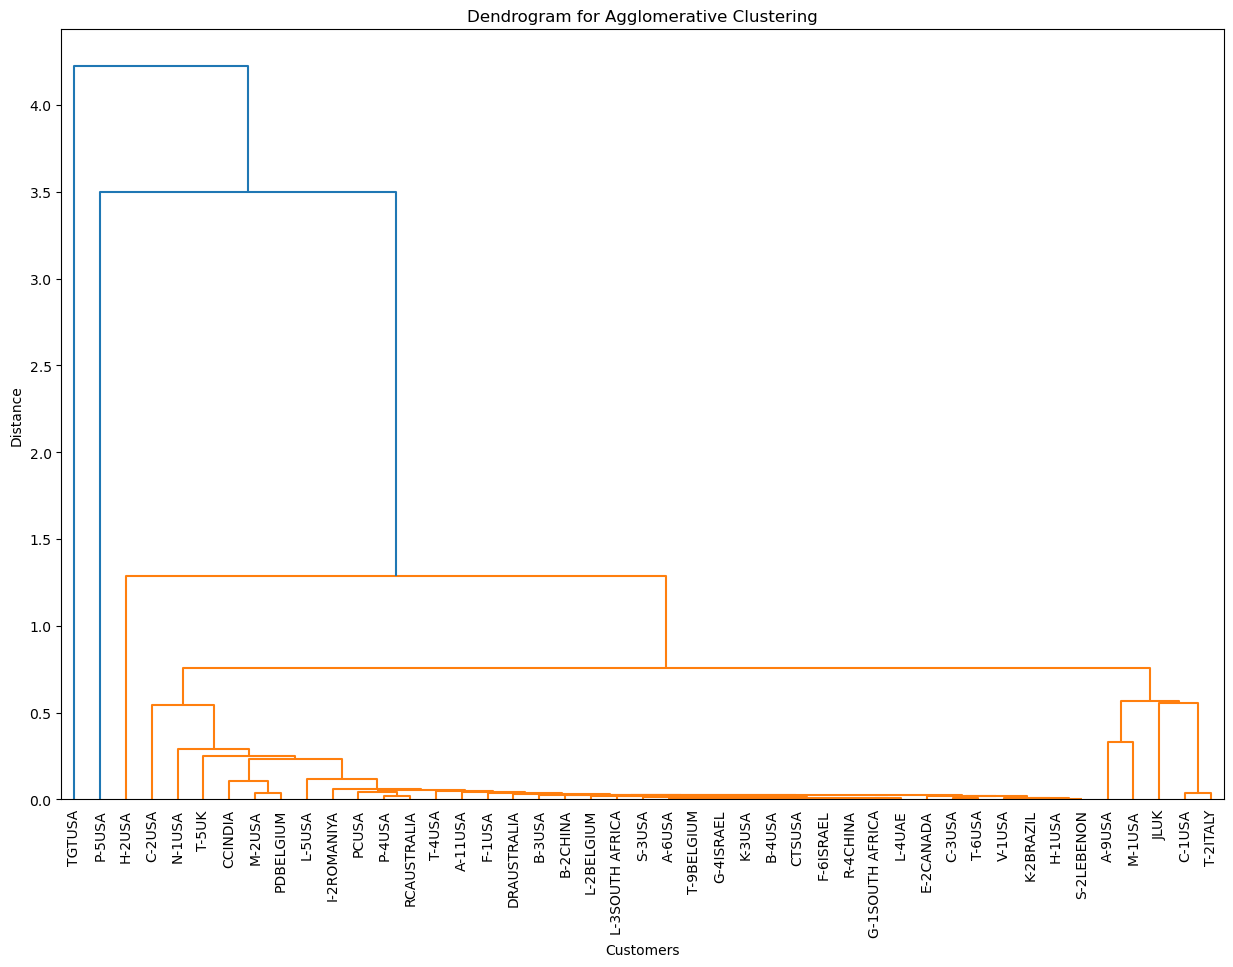

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Creating the linkage matrix for agglomerative clustering
Z = linkage(scaled_features)

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=customer_agg_data['customer_country'].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

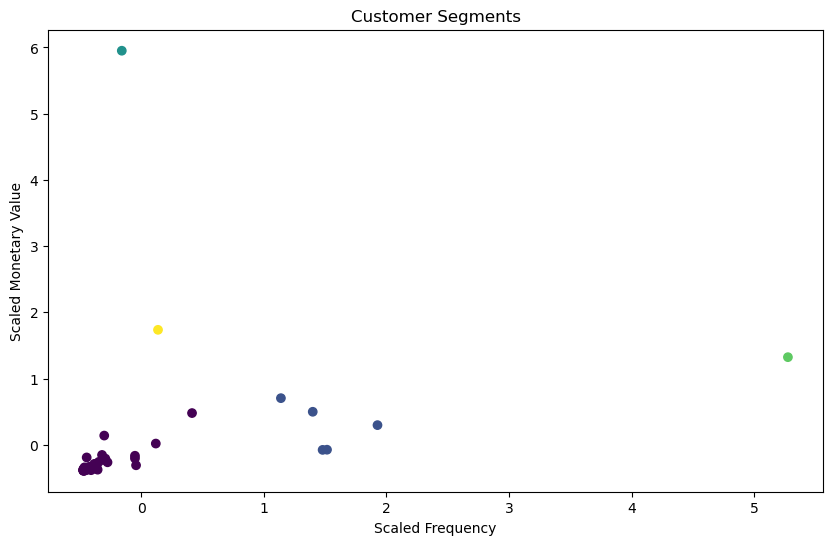

,Cluster,Frequency_Mean,Frequency_Min,Frequency_Max,Monetary_Mean,Monetary_Min,Monetary_Max,Customer_Count
0,0,15.189189,1,100,1.971055e+05,328.88,1557123.00,37
1,1,220.400000,181,269,1.182834e+06,563098.85,1959794.03,5
2,2,36.000000,36,36,1.134105e+07,11341052.51,11341052.51,1
3,3,643.000000,643,643,3.066518e+06,3066518.23,3066518.23,1
4,4,69.000000,69,69,3.804801e+06,3804801.30,3804801.30,1


In [ ]:
# Applying Agglomerative Clustering with the optimal number of clusters
agglo_cluster_final = AgglomerativeClustering(n_clusters=optimal_n_clusters)
customer_agg_data['agglomerative_cluster'] = agglo_cluster_final.fit_predict(scaled_features)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=customer_agg_data['agglomerative_cluster'], cmap='viridis', marker='o')
plt.title("Customer Segments")
plt.xlabel("Scaled Frequency")
plt.ylabel("Scaled Monetary Value")
plt.show()

# Analyzing each cluster
cluster_analysis = customer_agg_data.groupby('agglomerative_cluster').agg({
    'frequency': ['mean', 'min', 'max'],
    'monetary_value': ['mean', 'min', 'max', 'count']
}).reset_index()

cluster_analysis.columns = ['Cluster', 'Frequency_Mean', 'Frequency_Min', 'Frequency_Max', 'Monetary_Mean', 'Monetary_Min', 'Monetary_Max', 'Customer_Count']

cluster_analysis

### HDBSCAN

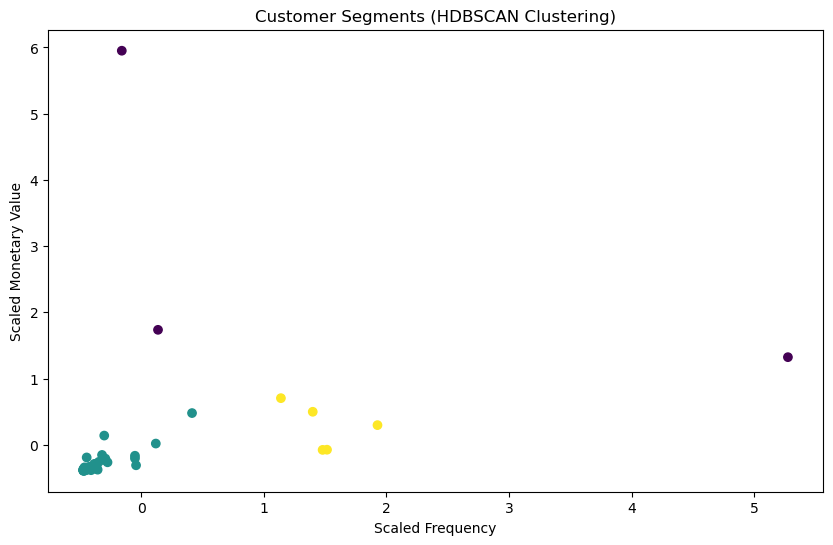

(-1     3
  0    37
  1     5
 Name: hdbscan_cluster, dtype: int64,
                 frequency                  monetary_value              \
                      mean median  min  max           mean      median   
 hdbscan_cluster                                                         
 -1                 249.33   69.0   36  643     6070790.68  3804801.30   
  0                  15.19    7.0    1  100      197105.51    65383.80   
  1                 220.40  219.0  181  269     1182834.33  1231578.28   
 
                                           
                         min          max  
 hdbscan_cluster                           
 -1               3066518.23  11341052.51  
  0                   328.88   1557123.00  
  1                563098.85   1959794.03  )

In [ ]:
hdbscan = HDBSCAN(min_cluster_size=2, cluster_selection_epsilon=1)
customer_agg_data['hdbscan_cluster'] = hdbscan.fit_predict(scaled_features)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=customer_agg_data['hdbscan_cluster'], cmap='viridis', marker='o')
plt.title("Customer Segments (HDBSCAN Clustering)")
plt.xlabel("Scaled Frequency")
plt.ylabel("Scaled Monetary Value")
plt.show()


# Checking the count of customers in each cluster
cluster_counts = customer_agg_data['hdbscan_cluster'].value_counts().sort_index()

# Descriptive statistics for each cluster
cluster_description = customer_agg_data.groupby('hdbscan_cluster').agg({
    'frequency': ['mean', 'median', 'min', 'max'],
    'monetary_value': ['mean', 'median', 'min', 'max']
})

cluster_counts, cluster_description.round(2)

In [ ]:
customer_agg_data

,customer_country,frequency,monetary_value,kmeans_cluster,agglomerative_cluster,hdbscan_cluster
0,A-11USA,11,185404.10,0,0,0
1,A-6USA,2,6247.46,0,0,0
2,A-9USA,210,1592079.79,1,1,1
3,B-2CHINA,8,14811.16,0,0,0
4,B-3USA,11,58626.86,0,0,0
5,B-4USA,1,26242.50,0,0,0
6,C-1USA,223,567620.72,1,1,1
7,C-2USA,100,1557123.00,1,0,0
8,C-3USA,7,99062.35,0,0,0
9,CCINDIA,49,147574.00,0,0,0
